1. A zone plate image has been given. Please use the code or its equivalent to
generate the image.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
N=501
x2 = (N-1)/2
x1 = -x2
x,y = np.meshgrid(np.arange(x1,x2),np.arange(x1,x2))
r= np.sqrt(x**2 + y**2)
km = 0.7*np.pi
rm = x2;
w = rm/10;
term1 = np.sin( (km * (r**2)) / (2 * rm) );
term2 = 0.5*np.tanh((rm - r)/w) + 0.5;
g = term1 * term2;
I = (g + 1)/2;

In [ ]:
I

array([[0.5       , 0.50010837, 0.49986643, ..., 0.50004052, 0.49986643,
        0.50010837],
       [0.50010837, 0.499866  , 0.50004307, ..., 0.50009852, 0.50004307,
        0.499866  ],
       [0.49986643, 0.50004307, 0.50009745, ..., 0.49983285, 0.50009745,
        0.50004307],
       ...,
       [0.50004052, 0.50009852, 0.49983285, ..., 0.50009248, 0.49983285,
        0.50009852],
       [0.49986643, 0.50004307, 0.50009745, ..., 0.49983285, 0.50009745,
        0.50004307],
       [0.50010837, 0.499866  , 0.50004307, ..., 0.50009852, 0.50004307,
        0.499866  ]])

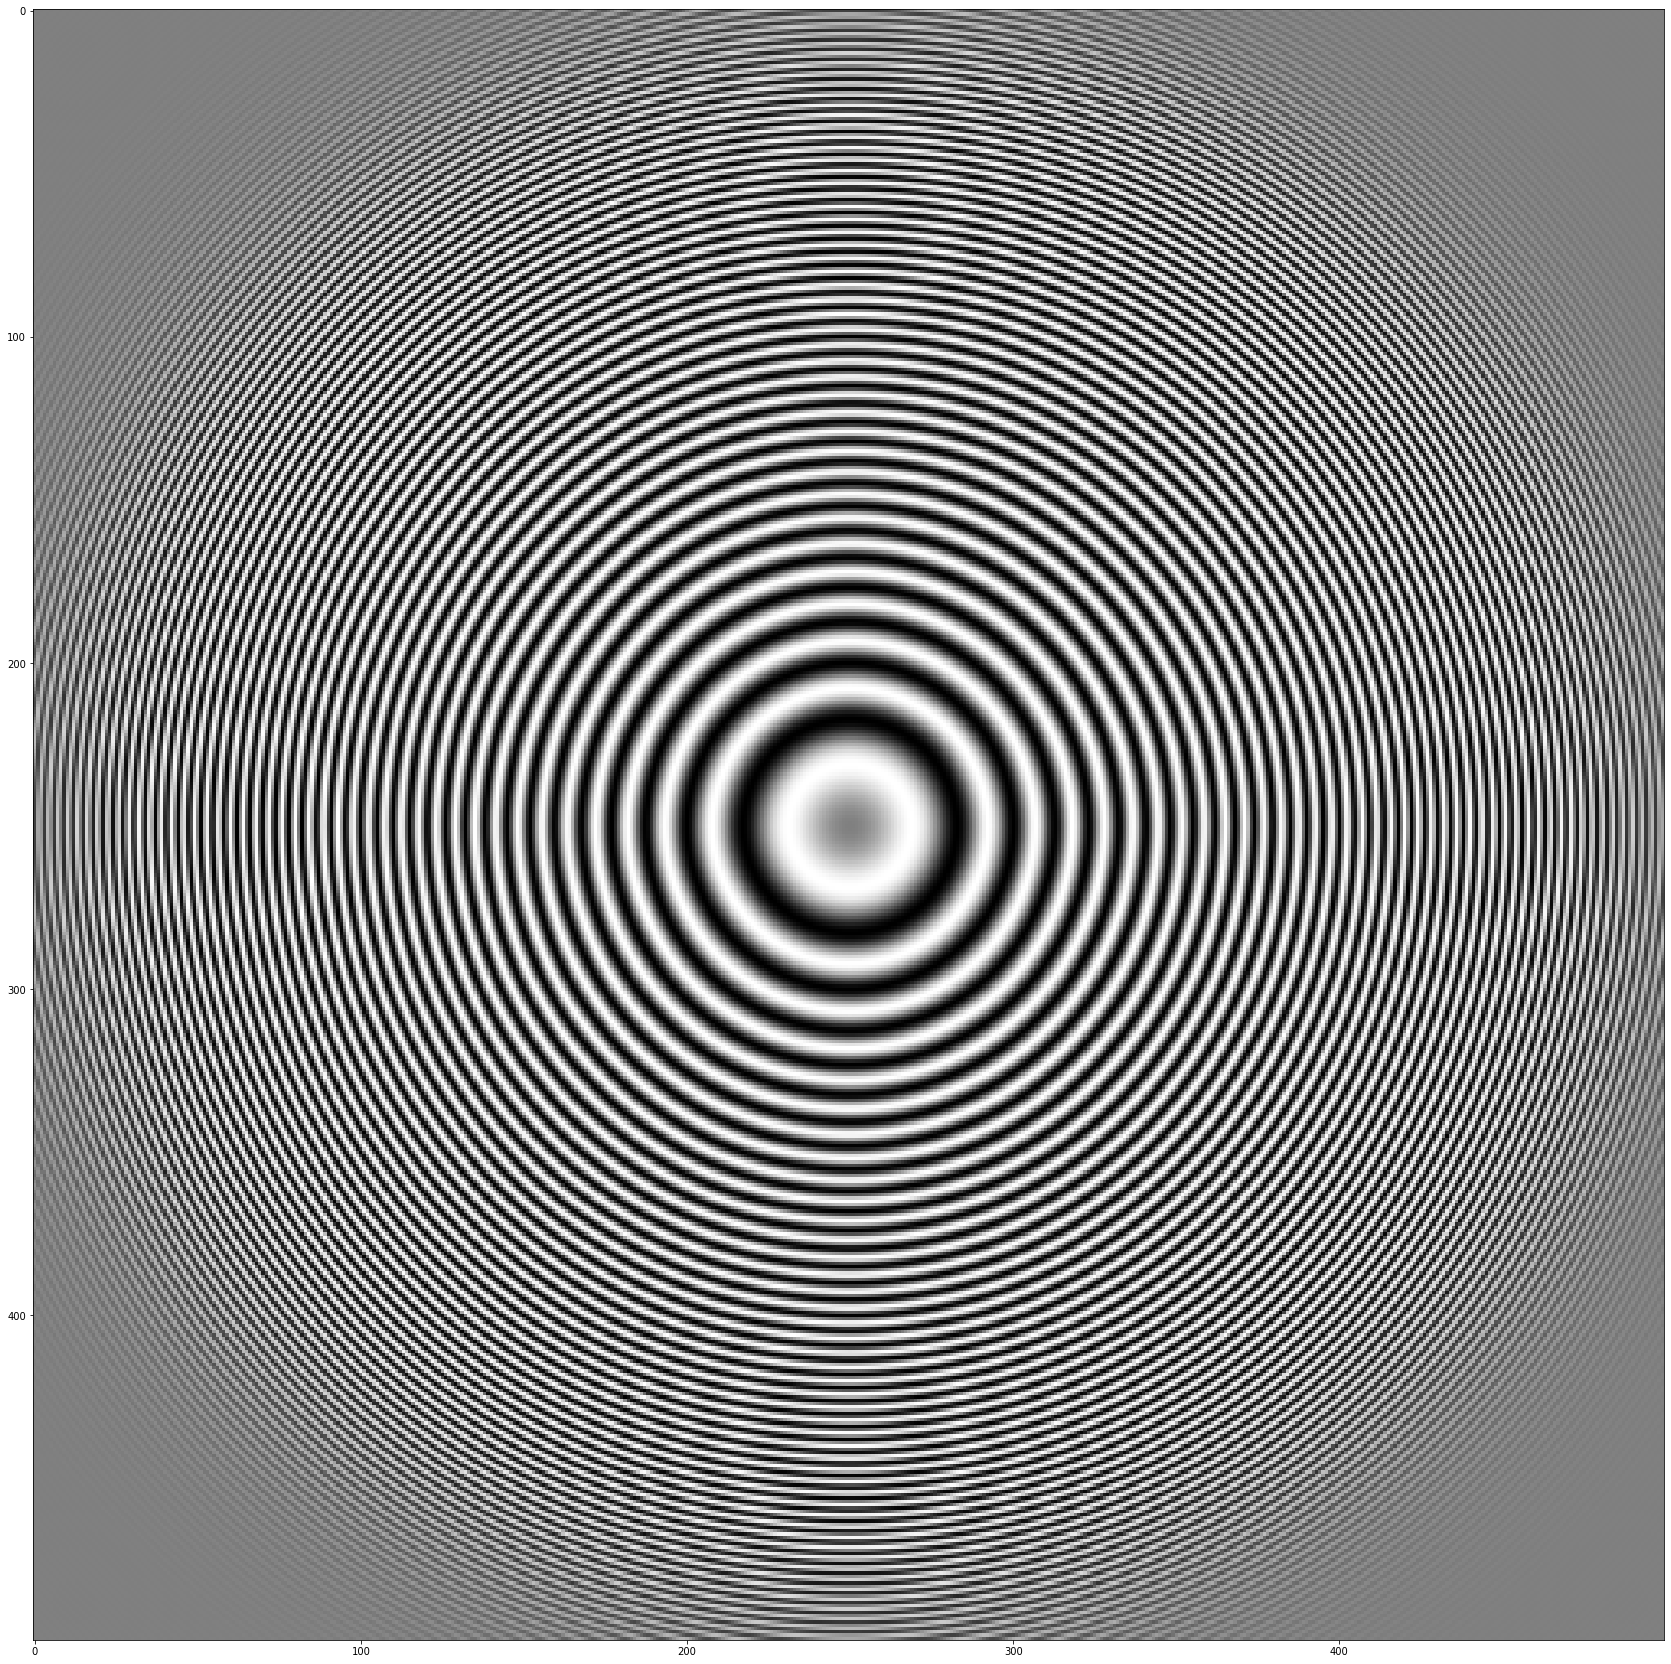

In [ ]:
plt.figure(figsize=(30,30))
plt.imshow(I,cmap="gray")
plt.show()

In [ ]:
I

array([[0.5       , 0.50010837, 0.49986643, ..., 0.50004052, 0.49986643,
        0.50010837],
       [0.50010837, 0.499866  , 0.50004307, ..., 0.50009852, 0.50004307,
        0.499866  ],
       [0.49986643, 0.50004307, 0.50009745, ..., 0.49983285, 0.50009745,
        0.50004307],
       ...,
       [0.50004052, 0.50009852, 0.49983285, ..., 0.50009248, 0.49983285,
        0.50009852],
       [0.49986643, 0.50004307, 0.50009745, ..., 0.49983285, 0.50009745,
        0.50004307],
       [0.50010837, 0.499866  , 0.50004307, ..., 0.50009852, 0.50004307,
        0.499866  ]])

i. Read the image into a variable. Give the image dimensions. Convert the
image to ‘uint8’ datatype. Make sure that your intensities are 0 to 255
(hint: you may simply multiply image by 255 and then convert to uint8,
because I ranges between 0≤I ≤ 1 (using: uint8(I.*255))).

In [ ]:
I=I*255
I=I.astype(np.int8)

In [ ]:
I

array([[127, 127, 127, ..., 127, 127, 127],
       [127, 127, 127, ..., 127, 127, 127],
       [127, 127, 127, ..., 127, 127, 127],
       ...,
       [127, 127, 127, ..., 127, 127, 127],
       [127, 127, 127, ..., 127, 127, 127],
       [127, 127, 127, ..., 127, 127, 127]], dtype=int8)

ii. Compute the mean intensity of the image.

In [ ]:
mean_img=np.mean(I)

In [ ]:
mean_img

3.059552

iii.Draw the image histogram and comment on the image contrast.

In [ ]:
hist=np.zeros(255)
for i in I:
  for j in i:
    hist[j]+=1

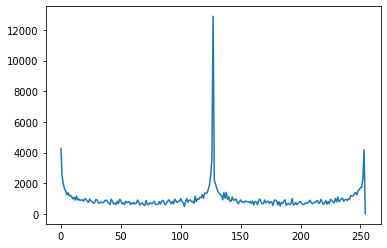

In [ ]:
plt.plot(hist)
plt.show()

iv.Use ‘imcrop’ and crop the centre image of size 250X250, store this in
variable ‘I_cropped’.

In [ ]:
I_cropped = I[249-125:249+125, 249-125:249+125]

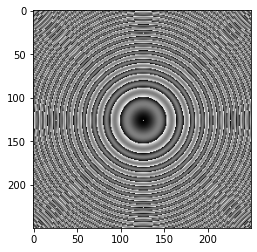

In [ ]:
plt.imshow(I_cropped,cmap="gray")
plt.show()

v. Perform an image smoothing by averaging on ‘I_cropped’.

In [ ]:
I_cropped=I_cropped.astype("Float32")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  """Entry point for launching an IPython kernel.


In [ ]:
I_cropped =cv2.blur(I_cropped,(5,5))

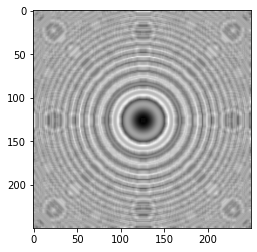

In [ ]:
plt.imshow(I_cropped,cmap="gray")
plt.show()

vi.Perform gaussian image smoothing operation (using 2 different σ, one high
and other low σ) on the image and perform a DoG operation. You first have
to generate a kernel and then perform smoothing on ‘I_cropped’.

In [ ]:
Gaussian_blur_low_sigma = cv2.GaussianBlur(I_cropped,(5,5),1)

In [ ]:
Gaussian_blur_high_sigma = cv2.GaussianBlur(I_cropped,(5,5),5)

In [ ]:
dog=Gaussian_blur_high_sigma-Gaussian_blur_low_sigma

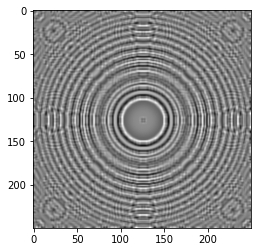

In [ ]:
plt.imshow(dog,cmap="gray")
plt.show()

vii.Perform gaussian image smoothing operation using a specific value of (low
σ, that you used in the previous step). Do this operation twice. What do
you get? Now perform gaussian smoothing οn the image using √2σ only
once. What do you get? Compare the 2 operations and interpret your
results.

In [ ]:
gaussian_sigma=cv2.GaussianBlur(I_cropped,(5,5),5)
gaussian_sigma=cv2.GaussianBlur(gaussian_sigma,(5,5),5)

In [ ]:
gaussian_sigma_root_2=cv2.GaussianBlur(I_cropped,(5,5),5*(2**0.5))

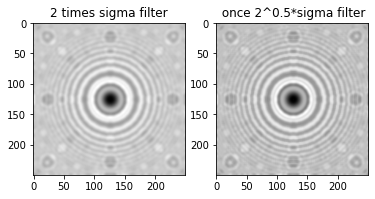

In [ ]:
plt.subplot(1,2,1)
plt.title("2 times sigma filter")
plt.imshow(gaussian_sigma,cmap="gray")
plt.subplot(1,2,2)
plt.title(" once 2^0.5*sigma filter")
plt.imshow(gaussian_sigma_root_2,cmap="gray")
plt.show()

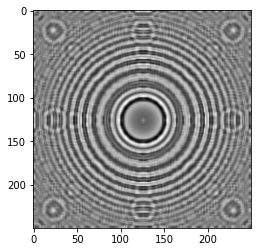

In [ ]:
plt.imshow(gaussian_sigma_root_2-gaussian_sigma,cmap="gray")
plt.show()

viii.Perform a ‘Log’ filtering operation on the image ‘I_cropped’ image.

In [ ]:
import scipy.ndimage as nd
LoG = nd.gaussian_laplace(I_cropped, 5)

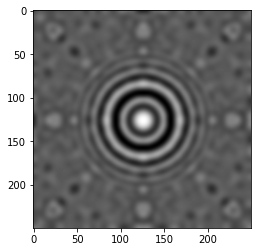

In [ ]:
plt.imshow(LoG,cmap="gray")
plt.show()

ix.Detect the edges of objects on the image.

In [ ]:
edges = cv2.Canny(np.uint8(I_cropped),100,100)

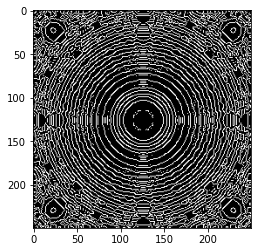

In [ ]:
plt.imshow(edges,cmap="gray")
plt.show()

x. Perform an image thresholding operation on the smoothened image.

In [ ]:
gaussian_sigma=cv2.GaussianBlur(I_cropped,(5,5),5)
ret,thresh1=cv2.threshold(gaussian_sigma,10,255,cv2.THRESH_BINARY) # binary threshold pixel_value>10 then pixel_value is  255 else 0.

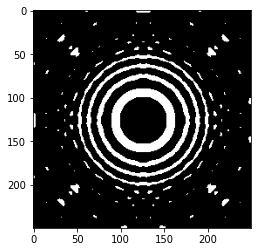

In [ ]:
plt.imshow(thresh1,cmap="gray")
plt.show()